# Tutorial 1: modules, methods, scripts
**Day 3, session 1:**

__Content creators:__ David Palecek, Paulo Martel

---
# Tutorial Objectives

* modules and libraries
* object oriented programming
* scripting

---
# Setup

In [4]:
# @title Helper Functions
import matplotlib.pyplot as plt
import numpy as np
import sys

---
# Section 1: Modules

*Time estimate: ~30mins*

![](https://github.com/Py-ualg/2024-intro-course/blob/main/tutorials/D3S1_modules_oop_scripting/static/imports_cheatsheet.png?raw=1)

* Think about a module/library as a folder/file hierarchy structure in your PC
* To step between folders or into files, use `.`

### The simplest module is one `.py` file with your functions
* create a file my_module.py in your current directory and put there your differential temperature function
* try to import (always use the function):
    * the whole module and use your `func`
    * import just the one function with its original name
    * import the `func` with a different name
* in this way you can use your functions across projects, the same way as publically distributed modules

In [ ]:
temps_portugal = [
    12.1, 12.5, 14.2, 15.9, 18.3, 21.1, 23.6, 24.2, 22.5, 19.4, 15.6, 13.2
]

temps_azores = [
    14.2, 14.1, 14.2, 14.6, 16.1, 18.1, 20.1, 21.4, 21.5, 19.8, 17.6, 15.6
]

---
# Section 2: Classes

*Time estimate: ~30mins*

* NumPy `ndarray` is a `class`, which has attributes (properties ie "variables") attached to it, as well as methods
* let's start in [SciPy Github repository](https://github.com/scipy/scipy). Investigate information and statistics about the project. This is power of open-source in action.
* Go to scipy/stats/_covariance.py. Compare code with the API [documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.Covariance.html#scipy.stats.Covariance). Can you identify what are methods and what are attributes?
* LICENSE, README, requirements.txt, .gitignore

### this is a GPT 4o output to this exact sentence (of course with some previous context :))
"Write me a python class example which will be managing monthly temperature data from world countries."

In [ ]:
class TemperatureData:
    def __init__(self):
        self.data = {}

    def add_country_data(self, country, monthly_temperatures):
        """Add or update monthly temperature data for a country.

        Args:
            country (str): The name of the country.
            monthly_temperatures (list of float): List of 12 monthly average temperatures.
        """
        if len(monthly_temperatures) != 12:
            raise ValueError("Monthly temperatures list must contain exactly 12 values.")
        self.data[country] = monthly_temperatures

    def get_country_data(self, country):
        """Retrieve the monthly temperature data for a country.

        Args:
            country (str): The name of the country.

        Returns:
            list of float: List of 12 monthly average temperatures.
        """
        return self.data.get(country, "No data available for this country.")

    def calculate_yearly_average(self, country):
        """Calculate the yearly average temperature for a country.

        Args:
            country (str): The name of the country.

        Returns:
            float: The yearly average temperature.
        """
        monthly_temperatures = self.get_country_data(country)
        if isinstance(monthly_temperatures, str):  # Check if data is not available
            return monthly_temperatures
        return sum(monthly_temperatures) / len(monthly_temperatures)

    def display_all_data(self):
        """Display all the temperature data stored."""
        for country, temps in self.data.items():
            print(f"{country}: {temps}")

# Example usage, DP: I did not know this will run in the notebook (what about Colab?)
if __name__ == "__main__":
    temp_data = TemperatureData()

    # Adding data for Portugal
    portugal_temps = [12.1, 12.5, 14.2, 15.9, 18.3, 21.1, 23.6, 24.2, 22.5, 19.4, 15.6, 13.2]
    temp_data.add_country_data("Portugal", portugal_temps)

    # Adding data for Azores
    azores_temps = [14.2, 14.1, 14.2, 14.6, 16.1, 18.1, 20.1, 21.4, 21.5, 19.8, 17.6, 15.6]
    temp_data.add_country_data("Azores", azores_temps)

    # Adding data for Madeira
    madeira_temps = [16.5, 16.4, 16.7, 17.1, 18.2, 20.1, 22.3, 23.7, 23.8, 22.2, 19.8, 17.9]
    temp_data.add_country_data("Madeira", madeira_temps)

    # Retrieving data for Portugal
    print("Portugal monthly temperatures:", temp_data.get_country_data("Portugal"))

    # Calculating yearly average temperature for Azores
    print("Azores yearly average temperature:", temp_data.calculate_yearly_average("Azores"))

    # Displaying all data
    temp_data.display_all_data()

Portugal monthly temperatures: [12.1, 12.5, 14.2, 15.9, 18.3, 21.1, 23.6, 24.2, 22.5, 19.4, 15.6, 13.2]
Azores yearly average temperature: 17.275000000000002
Portugal: [12.1, 12.5, 14.2, 15.9, 18.3, 21.1, 23.6, 24.2, 22.5, 19.4, 15.6, 13.2]
Azores: [14.2, 14.1, 14.2, 14.6, 16.1, 18.1, 20.1, 21.4, 21.5, 19.8, 17.6, 15.6]
Madeira: [16.5, 16.4, 16.7, 17.1, 18.2, 20.1, 22.3, 23.7, 23.8, 22.2, 19.8, 17.9]


### Tasks
* Explain __ main __ usage
* Add this class to your module
  1. import class and use it
  2. run the module as a script with `%run <module_name>.py`

---
# Section 3: More on scripting

*Time estimate: ~15mins*

* Once your NB works well, you might simply run the code without exploratory analyses, plots etc. Just speed and results => scripts
* input arguments
    * argparse
    * sys.argv

In [18]:
# @title Example with sys.argv

%%writefile monthly_temp_argv.py
#!usr/bin/bash python

import sys
import numpy as np
import matplotlib.pyplot as plt

tempData = {
    'Portugal':[12.1, 12.5, 14.2, 15.9, 18.3, 21.1, 23.6, 24.2, 22.5, 19.4, 15.6, 13.2],
    'Azores': [14.2, 14.1, 14.2, 14.6, 16.1, 18.1, 20.1, 21.4, 21.5, 19.8, 17.6, 15.6],
    'Madeira': [16.5, 16.4, 16.7, 17.1, 18.2, 20.1, 22.3, 23.7, 23.8, 22.2, 19.8, 17.9],
}

months = ['Jan', 'Feb', 'Mar', 'Apr',
          'May', 'Jun', 'Jul', 'Aug',
          'Sep', 'Oct', 'Nov', 'Dec']

def main():
    # check number of arguments.
    if len(sys.argv) != 2:
        print("Usage: python monthly_temp_argv.py <country>")
        sys.exit(1)

    country = sys.argv[1]

    print(f"Average yearly temperature in {country} is {np.round(np.mean(tempData[country]), 2)}.")
    plt.plot(months, tempData[country])
    plt.title(f'Monthly temperature in {country}.')
    plt.show()

if __name__ == "__main__":
    main()

Overwriting monthly_temp_argv.py


Average yearly temperature in Portugal is 17.72.


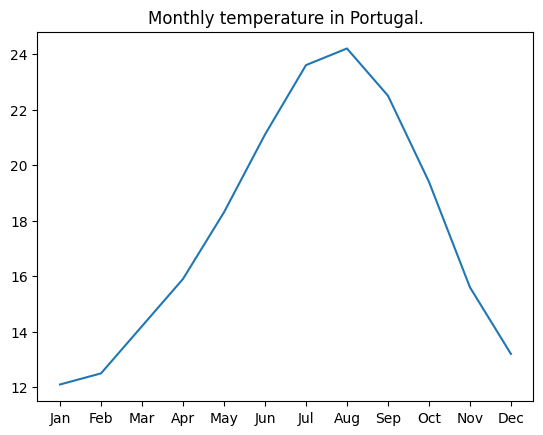

<Figure size 640x480 with 0 Axes>

In [22]:
%run monthly_temp_argv.py 'Portugal'

In [7]:
# @title Using argparse

%%writefile monthly_temp_argparse.py
#!usr/bin/bash python

import argparse
import numpy as np
import matplotlib.pyplot as plt

tempData = {
    'Portugal':[12.1, 12.5, 14.2, 15.9, 18.3, 21.1, 23.6, 24.2, 22.5, 19.4, 15.6, 13.2],
    'Azores': [14.2, 14.1, 14.2, 14.6, 16.1, 18.1, 20.1, 21.4, 21.5, 19.8, 17.6, 15.6],
    'Madeira': [16.5, 16.4, 16.7, 17.1, 18.2, 20.1, 22.3, 23.7, 23.8, 22.2, 19.8, 17.9],
}

months = ['Jan', 'Feb', 'Mar', 'Apr',
          'May', 'Jun', 'Jul', 'Aug',
          'Sep', 'Oct', 'Nov', 'Dec']

def main():
    parser = argparse.ArgumentParser(description="Calculate mean temperature and plot monthly graph")
    parser.add_argument('country', type=str, help="Country name")

    args = parser.parse_args()

    print(f"Average yearly temperature in {args.country} is {np.round(np.mean(tempData[args.country]), 2)}.")

    plt.plot(months, tempData[args.country], label=args.country)
    plt.title(f'Monthly temperature in {args.country}.')
    plt.legend()
    plt.show()

if __name__ == "__main__":
    main()

Overwriting monthly_temp_argparse.py


Average yearly temperature in Portugal is 17.72.


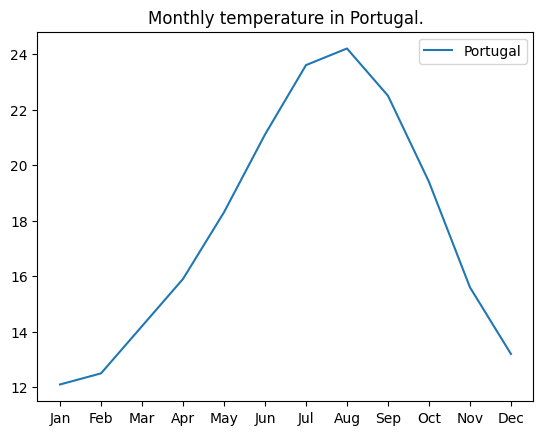

<Figure size 640x480 with 0 Axes>

In [9]:
%run monthly_temp_argparse.py 'Portugal'

---
# Section 4: Exercise

* Modify the argparse script that it can accept list of countries and you plot temperatures for all of them.

---
# Section 5: QA session before we jump on pandas?

### Other useful modules
* scipy.stats
* numpy.stats
* statsmodels
* sklearn (scikit-learn), ML
* pytorch, tensorflow (AI)
* opencv
* biopython

---
# Section 6: Histogram exercise

---
# Feedback
* Please help us learn too.
* [feedback form](https://forms.gle/WmqtpHXwFdDuiohBA)